Número estimado de clústeres: 2
Número estimado de puntos de ruido: 2


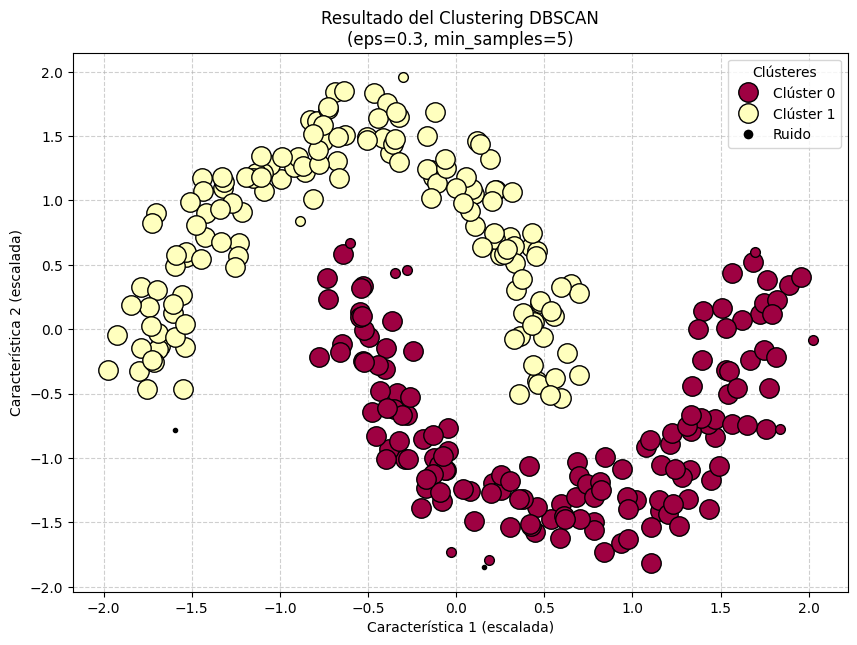

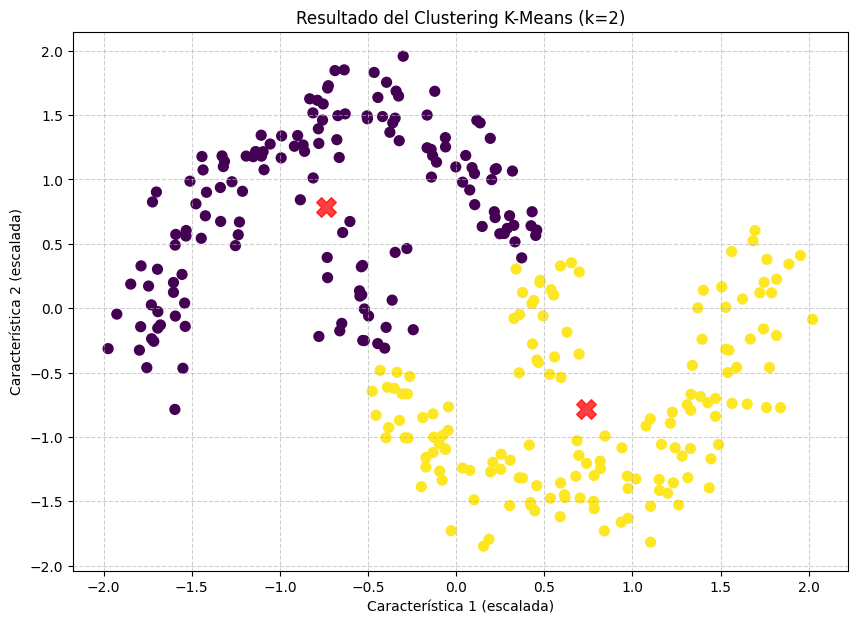


Comparación:
DBSCAN pudo separar las dos 'lunas' correctamente.
K-Means, al asumir clústeres esféricos, divide las lunas por la mitad.


In [ ]:
"""
Ejemplo Práctico de DBSCAN en Python

Este script demuestra el uso del algoritmo DBSCAN para agrupar datos
utilizando la biblioteca scikit-learn. Genera datos de ejemplo con
formas no convexas (dos lunas entrelazadas) y aplica DBSCAN para
identificar los clústeres y el ruido.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# --- 1. Generación de Datos de Ejemplo ---
# make_moons es ideal para DBSCAN porque crea formas no convexas
# que K-Means manejaría mal.
# n_samples: número total de puntos
# noise: desviación estándar del ruido Gaussiano añadido
# random_state: para reproducibilidad
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Es buena práctica escalar los datos antes de aplicar DBSCAN,
# ya que el parámetro 'eps' es sensible a la escala de las características.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Configuración y Aplicación de DBSCAN ---
# Instanciar el modelo DBSCAN
# eps: El radio de la vecindad. Este es un parámetro crucial y
#      a menudo requiere ajuste (tuning). Un valor común para empezar
#      con datos escalados es entre 0.1 y 0.5.
# min_samples: El número mínimo de puntos en una vecindad para que
#              un punto sea considerado como 'core point' (MinPts).
#              Otro parámetro importante para ajustar.
dbscan = DBSCAN(eps=0.3, min_samples=5) # Valores iniciales, pueden requerir ajuste

# Ajustar el modelo a los datos escalados
dbscan.fit(X_scaled)

# --- 3. Obtención de Resultados ---
# Etiquetas de clúster asignadas por DBSCAN.
# Los puntos de ruido (outliers) son etiquetados como -1.
labels = dbscan.labels_

# Identificar los puntos centrales (core points) - opcional pero informativo
# core_sample_indices_ es un array con los índices de los puntos centrales
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Número de clústeres encontrados (excluyendo el ruido)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Número estimado de clústeres: {n_clusters_}')
print(f'Número estimado de puntos de ruido: {n_noise_}')

# --- 4. Visualización de Resultados ---
plt.figure(figsize=(10, 7))

# Crear una máscara para identificar puntos únicos y sus colores
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Iterar sobre cada etiqueta única (clúster o ruido)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color negro para el ruido
        col = [0, 0, 0, 1]
        marker_size = 6 # Tamaño más pequeño para ruido
        label_text = 'Ruido'
    else:
        marker_size = 14 # Tamaño más grande para puntos de clúster
        label_text = f'Clúster {k}'

    # Máscara para seleccionar puntos de la etiqueta actual
    class_member_mask = (labels == k)

    # Graficar puntos centrales del clúster actual (más grandes)
    xy_core = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy_core[:, 0], xy_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marker_size, label=label_text if k != -1 else None)

    # Graficar puntos frontera del clúster actual (más pequeños)
    xy_border = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy_border[:, 0], xy_border[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marker_size / 2) # Mitad de tamaño para frontera

# Configuración de la gráfica
plt.title(f'Resultado del Clustering DBSCAN\n(eps={dbscan.eps}, min_samples={dbscan.min_samples})')
plt.xlabel("Característica 1 (escalada)")
plt.ylabel("Característica 2 (escalada)")
# Crear leyenda única
handles, labels_legend = plt.gca().get_legend_handles_labels()
# Añadir entrada para ruido si existe
if -1 in unique_labels:
    noise_handle = plt.Line2D([0], [0], marker='o', color='w', label='Ruido',
                              markerfacecolor='black', markersize=8)
    handles.append(noise_handle)
    labels_legend.append('Ruido')

# Reordenar para que Ruido quede al final si existe
if 'Ruido' in labels_legend:
    idx = labels_legend.index('Ruido')
    handles.append(handles.pop(idx))
    labels_legend.append(labels_legend.pop(idx))


plt.legend(handles=handles, labels=labels_legend, title="Clústeres")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 5. (Opcional) Comparación con K-Means ---
# Para ilustrar por qué DBSCAN es útil en este caso
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # K-Means necesita saber k=2
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Resultado del Clustering K-Means (k=2)')
plt.xlabel("Característica 1 (escalada)")
plt.ylabel("Característica 2 (escalada)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nComparación:")
print("DBSCAN pudo separar las dos 'lunas' correctamente.")
print("K-Means, al asumir clústeres esféricos, divide las lunas por la mitad.")

Número estimado de clústeres: 2
Número estimado de puntos de ruido: 12
(Esperábamos 20 puntos de ruido añadidos manualmente, más cualquier ruido inherente de make_circles)


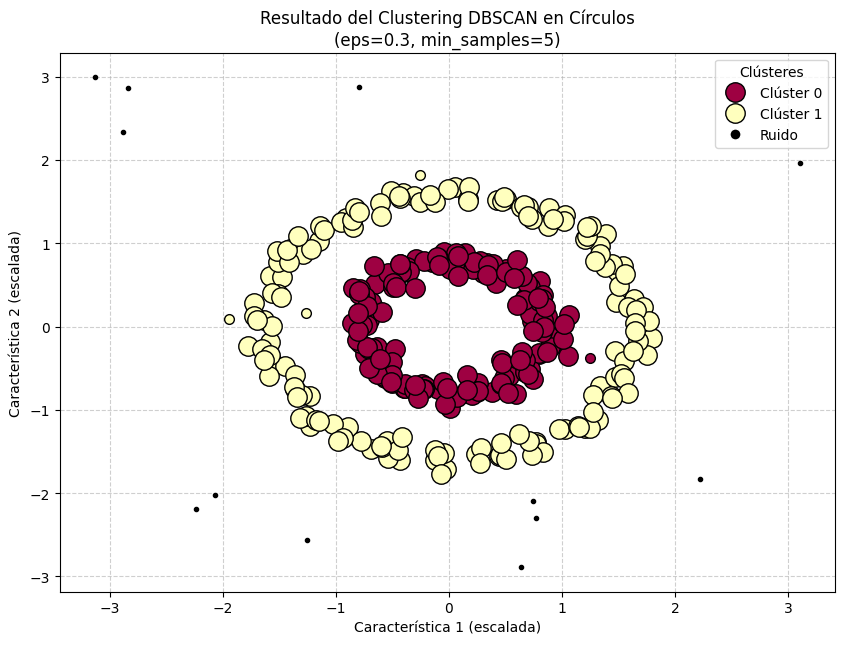

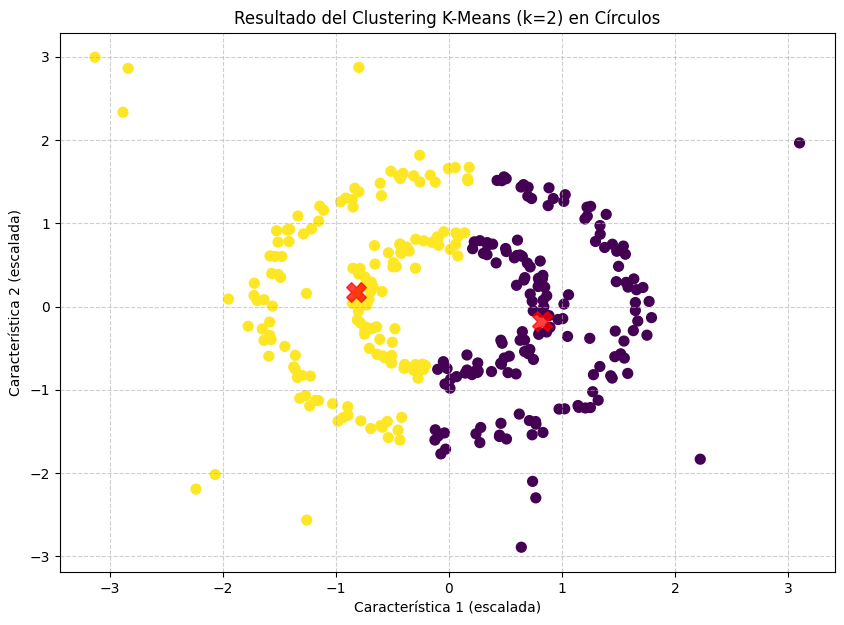


Comparación:
DBSCAN pudo identificar los dos círculos como clústeres separados y marcó los outliers como ruido.
K-Means no puede separar los círculos concéntricos y los divide incorrectamente.


In [ ]:
# -*- coding: utf-8 -*-
"""
Ejemplo Práctico de DBSCAN en Python - Círculos Concéntricos

Este script demuestra el uso de DBSCAN en un conjunto de datos
de círculos concéntricos, otro caso donde K-Means falla.
También incluye puntos de ruido añadidos manualmente para
resaltar la capacidad de DBSCAN para identificarlos.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 1. Generación de Datos de Ejemplo ---
# make_circles crea dos círculos concéntricos.
# n_samples: número total de puntos (dividido entre los dos círculos)
# noise: desviación estándar del ruido Gaussiano añadido
# factor: factor de escala entre el círculo interior y exterior
# random_state: para reproducibilidad
X_circles, y_true_circles = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Añadir algunos puntos de ruido (outliers) manualmente
# Crear puntos aleatorios distribuidos en un área más grande
np.random.seed(42) # Para reproducibilidad del ruido
n_outliers = 20
outliers = np.random.uniform(low=-2, high=2, size=(n_outliers, 2))

# Combinar los datos de los círculos con los outliers
X = np.vstack([X_circles, outliers])

# --- 2. Escalado de Datos ---
# Escalar los datos combinados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Configuración y Aplicación de DBSCAN ---
# Ajustar los parámetros eps y min_samples puede ser necesario
# dependiendo de la densidad de los círculos y el ruido.
# Probemos con valores similares al ejemplo anterior, ajustando si es necesario.
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# --- 4. Obtención de Resultados ---
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Número estimado de clústeres: {n_clusters_}')
print(f'Número estimado de puntos de ruido: {n_noise_}')
print(f'(Esperábamos {n_outliers} puntos de ruido añadidos manualmente, '
      f'más cualquier ruido inherente de make_circles)')

# --- 5. Visualización de Resultados DBSCAN ---
plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # Negro para ruido
        marker_size = 6
        label_text = 'Ruido'
    else:
        marker_size = 14
        label_text = f'Clúster {k}'

    class_member_mask = (labels == k)

    # Puntos centrales
    xy_core = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy_core[:, 0], xy_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marker_size, label=label_text if k != -1 else None)

    # Puntos frontera
    xy_border = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy_border[:, 0], xy_border[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marker_size / 2)

# Configuración de la gráfica
plt.title(f'Resultado del Clustering DBSCAN en Círculos\n(eps={dbscan.eps}, min_samples={dbscan.min_samples})')
plt.xlabel("Característica 1 (escalada)")
plt.ylabel("Característica 2 (escalada)")

# Crear leyenda única
handles, labels_legend = plt.gca().get_legend_handles_labels()
if -1 in unique_labels:
    noise_handle = plt.Line2D([0], [0], marker='o', color='w', label='Ruido',
                              markerfacecolor='black', markersize=8)
    handles.append(noise_handle)
    labels_legend.append('Ruido')

# Reordenar leyenda si es necesario
if 'Ruido' in labels_legend:
    idx = labels_legend.index('Ruido')
    handles.append(handles.pop(idx))
    labels_legend.append(labels_legend.pop(idx))

plt.legend(handles=handles, labels=labels_legend, title="Clústeres")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- 6. (Opcional) Comparación con K-Means ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # K-Means necesita k=2
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Resultado del Clustering K-Means (k=2) en Círculos')
plt.xlabel("Característica 1 (escalada)")
plt.ylabel("Característica 2 (escalada)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nComparación:")
print("DBSCAN pudo identificar los dos círculos como clústeres separados y marcó los outliers como ruido.")
print("K-Means no puede separar los círculos concéntricos y los divide incorrectamente.")